In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re, random
from scipy.stats import beta, norm

# Example

We draw with replacement from a bucket of black and white balls.  The parameter $\theta_b$ is the probability of drawing a black ball, and $\theta_w$ is the probability of a white ball: $P(b|\theta_b,\theta_w) = \theta_b$ and $P(w|\theta_b,\theta_w) = \theta_w = 1 - \theta_b$. $$$$

We draw $n$ balls from the bucket. What is our estimate of $\theta_b$? $$$$

 ## Independent and identically distributed (i.i.d)

- If the data generating mechanism depends on $\theta$ only (and not on what has been generated before), the sequence of data is called independent and identically distributed.
- Then 
\begin{eqnarray*}
 P(d_1, d_2, \ldots, d_n|\theta) = \prod_{i=1}^{n} P(d_i|\theta).
\end{eqnarray*}
- And order of $d_i$ doesn't matter:
\begin{eqnarray*}
 P(b, w, b, b, w\mid \theta) & = & P(b, b, b, w, w |\theta)\\
 & = & P(b|\theta)  P(b|\theta)  P(b|\theta)  P(w|\theta)  P(w|\theta). 
\end{eqnarray*}


## Bernoulli model

- A model for i.i.d. binary outcomes: (heads, tails), (black, white), (0, 1), (true, false),...
- One parameter: $\theta\in [0, 1]$. For example, $ P(d = true\mid \theta) = \theta $, $ P(d = false\mid \theta) = 1-\theta $.$$$$
- Note that the probabilities of $d$ being true are **determined by** $\theta$. Parameters are not probabilities.$$$$
- As the parameter $\theta$ determines a unique model, we call also the model as $\theta$.$$$$ 
- Easy to show that $E[d] =\theta$ and $\textrm{var}[d] = \theta (1-\theta)$.$$$$
- Black and white ball bucket as a Bernoulli model:
 - $\theta$ is the proportion of the black balls in a bucket, $P(b\mid \theta) = \theta$.$$$$
 - **Likelihood:** $P(D\mid\theta) = \theta^{N_b} (1 - \theta)^{N_w}$, where $N_b$ and $N_w$ are the numbers of black and white balls in the data $D$, respectively.$$$$
 - Note that $P(D\mid\theta)$ depends on the data $D$ through $N_b$ and $N_w$ only (= sufficient statistics).$$$$

In [2]:
def likelihood(D, theta):
    n_w = len(re.findall('w', D))
    n_b = len(re.findall('b', D))
    return theta**n_b*(1-theta)**n_w

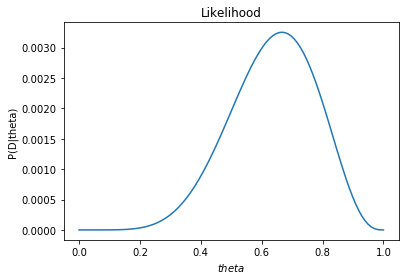

In [3]:
# Observe data
D = 'wbbbwbbbw'
n_w = len(re.findall('w', D))
n_b = len(re.findall('b', D))

# Plot the likelihood as a function of theta
t = np.linspace(0, 1, 100)
y = likelihood(D, t)

plt.plot(t, y)
plt.title('Likelihood')
plt.ylabel('P(D|theta)')
plt.xlabel('$theta$')
plt.show()

Note: Likelihood is a function of $\theta$. Thus, the area under the curve is not necessarily $1$$$$$

## Maximum likelihood parameters for the Bernoulli model
 
- Let us find Maximum likelihood (ML) parameters for the Bernoulli model for the data with $N_b$ black balls and $N_w$ white ones.$$$$
- Likelihood: $P(D\mid\theta) = \theta^{N_b}(1-\theta)^{N_w}$.
- Let us check when $P'(D\mid\theta) = 0$, $\theta \in ]0, 1[$:
  \begin{eqnarray*}
  P'(D\mid\theta) & = & N_b \theta^{N_b - 1}(1 - \theta)^{N_w} + \theta^{N_b} N_{w} (1 - \theta)^{N_w - 1}(-1)\\
   & = & \theta^{N_b -1}(1-\theta)^{N_w - 1}[N_b(1 - \theta) -\theta N_w]\\
   & = & \theta^{N_b -1}(1-\theta)^{N_w - 1}[N_b - (N_b + N_w)\theta] = 0\\
   & \Leftrightarrow & N_b - (N_b + N_w)\theta = 0\\
   & \Leftrightarrow & \theta = \frac{N_b}{N_b + N_w}.
  \end{eqnarray*}

In [4]:
# Problem with maximum likelihood
D_prime = 'ww'
n_w_prime = len(re.findall('w', D_prime))
n_b_prime = len(re.findall('b', D_prime))

theta_ml = n_b_prime/(n_b_prime + n_w_prime)

print('theta_ml = %s' % theta_ml)

theta_ml = 0.0


# Bayesian approach

## A possible prior

We can discretise the range of $\theta_b$ and consider

In [5]:
theta_values = np.linspace(0, 1, 11)
prior_p = [0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05]
#prior_p = [0, 0.02, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.15, 0.05, 0]

assert(len(theta_values) == len(prior_p))
assert(np.sum(prior_p) == 1)

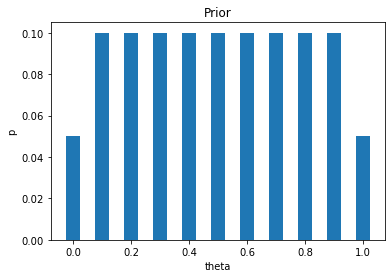

In [6]:
plt.bar(x=theta_values, height=prior_p, width=0.05)
plt.title('Prior')
plt.xlabel('theta')
plt.ylabel('p')
plt.show()

In [7]:
# Compute posterior
posterior_unnormalized = prior_p*likelihood(D, theta_values) # Joint probability
evidence = np.sum(posterior_unnormalized)
posterior = posterior_unnormalized/evidence

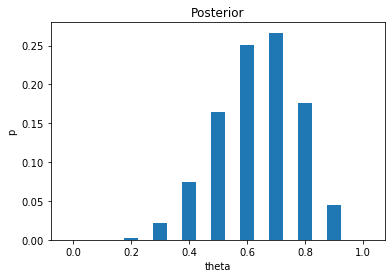

In [8]:
# Plot the posterior
plt.bar(x=theta_values, height=posterior, width=0.05)
plt.title('Posterior')
plt.xlabel('theta')
plt.ylabel('p')
plt.show()

## Beta distribution

- The density is in form $P(\theta) = c \theta^{\alpha - 1}(1 -\theta)^{\beta - 1}$, where the normalization constant is 
  \begin{eqnarray*}
   c & = & \frac{1}{\int_{0}^{1} \theta^{\alpha - 1}(1 -\theta)^{\beta - 1} \mathrm{d} \theta}\\
   & = & \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)},
  \end{eqnarray*}
  where $\Gamma$ is the gamma function, a continuous version of the factorial: $\Gamma(n) = (n -1)!$.
- Mean = $\frac{\alpha}{\alpha + \beta}$, mode = $\frac{\alpha - 1}{\alpha + \beta- 2}$ (for $\alpha>1, \beta>1$)$$$$

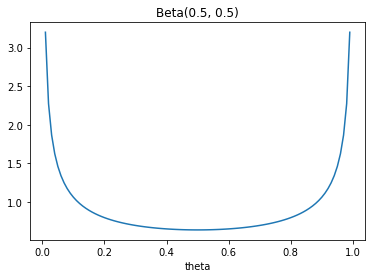

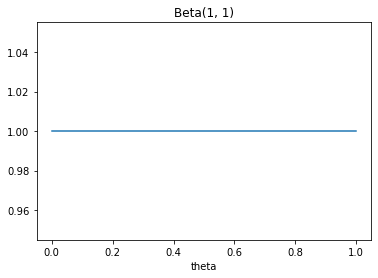

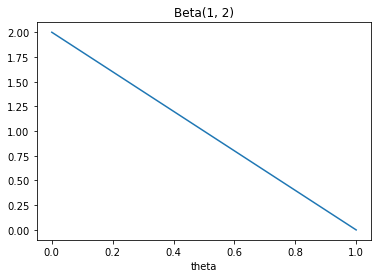

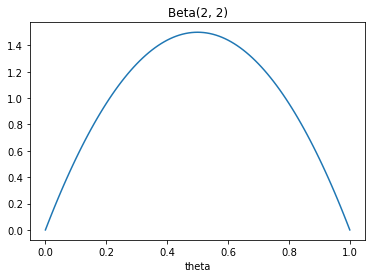

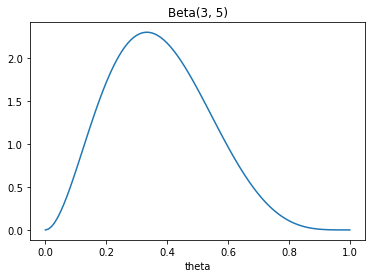

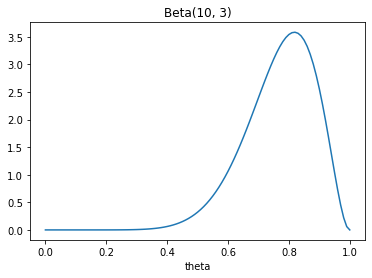

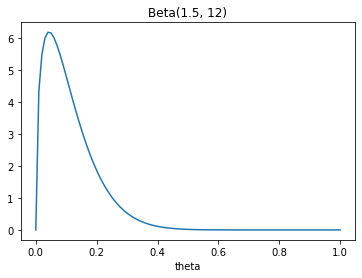

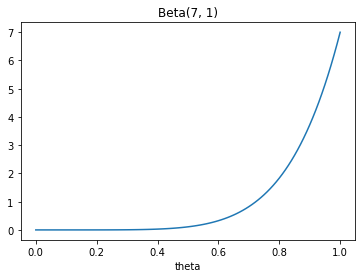

In [9]:
# Visualise the beta distribution with different parameter values
aa = [0.5, 1, 1, 2, 3, 10, 1.5, 7]
bb = [0.5, 1, 2, 2, 5 ,3, 12, 1]
x = np.linspace(0, 1, 101)

for i in range(len(aa)):
    a = aa[i]
    b = bb[i]
    dist = beta(a, b)
    y = dist.pdf(x)
    plt.plot(x,y)
    plt.title('Beta(%s, %s)' % (a, b))
    plt.xlabel('theta')
    plt.show()

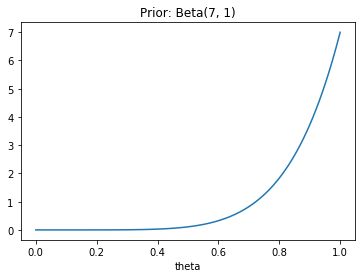

In [10]:
# Let's use a beta prior
a_prior = 7
b_prior = 1

prior2 = beta(a_prior, b_prior)

x = np.linspace(0, 1, 101)
y = prior2.pdf(x)

plt.plot(x, y)
plt.title('Prior: Beta(%s, %s)' % (a_prior, b_prior))
plt.xlabel('theta')
plt.show()

## Posterior with beta prior

- The forms of the likelihood and the prior seem comfortable
 - $P(D\mid\theta) = \theta^{N_b}(1 -\theta)^{N_w}$
 - We define the prior $P(\theta) = c \theta^{\alpha - 1}(1 -\theta)^{\beta - 1}$, where the normalization constant $c$ takes care that $\int P(\theta)\mathrm{d}\theta = 1$.$$$$
 - Then $P(D\mid\theta) P(\theta) = c \theta^{N_b + \alpha - 1}(1 -\theta)^{N_w + \beta - 1}$$$$$
- Thus updating from prior to posterior is easy: just use the formula for the prior, and update exponents $\alpha - 1$ and $\beta - 1$ (conjugate prior).$$$$
- $\alpha$ and $\beta$ are parameters of the prior distribution, i.e., hyperparameters.$$$$
- \begin{eqnarray*}
 P(\theta\mid D, \alpha, \beta) = \frac{\Gamma(\alpha + N_b + \beta + N_w)}{\Gamma(\alpha + N_b)\Gamma(\beta + N_w)} \theta^{\alpha + N_b -1} (1 - \theta)^{\beta + N_w - 1}
\end{eqnarray*}
- Thus, a posteriori, $\theta_b$ is distributed by $\mathrm{Beta}(\alpha + N_b$, $\beta + N_w)$ $$$$

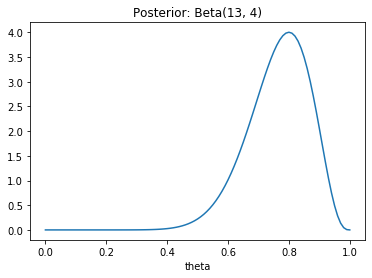

In [11]:
# Compute and plot the posterior
show_point_estimates = False

a_posterior = a_prior + n_b
b_posterior = b_prior + n_w

posterior2 = beta(a_posterior, b_posterior)

x = np.linspace(0, 1, 101)
y = posterior2.pdf(x)

plt.plot(x, y)
plt.title('Posterior: Beta(%s, %s)' % (a_posterior, b_posterior))
plt.xlabel('theta')

if show_point_estimates:
    plt.plot([theta_map, theta_map], [0, posterior2.pdf(theta_map)], c='r', label='MAP')
    plt.plot([theta_ml, theta_ml], [0, posterior2.pdf(theta_ml)], c='m', label='ML')
    plt.plot([theta_mean, theta_mean], [0, posterior2.pdf(theta_mean)], c='c', label='Mean')

    plt.legend()
plt.show()

## Bayesian updating

- Start with a prior with hyperparameters $\alpha$ and $\beta$. Now $\theta \sim \mathrm{Beta}(\alpha, \beta)$.$$$$
- Observe data with $N_w$ white balls and $N_b$ black ones. A posteriori   $\theta \sim \mathrm{Beta}(N_b + \alpha, N_w + \beta)$.$$$$
- We observe another data, now with $N_{w}' $ white balls and $N_b'$ black ones. We use the posteriori distribution  obtained earlier as our prior. Now the updated posteriori is  $\theta \sim \mathrm{Beta}(N_b + N_b' + \alpha, N_w + N_w' + \beta)$.$$$$
- This is equivalent to combining the two small datasets into a big one.
- An advantage of sequential Bayesian updating is that you can learn online and you don't need to store the data.

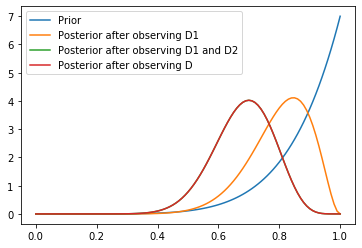

In [12]:
D1 = 'wbbwwww'
D2 = 'bbwwbbw'
D = D1 + D2

n_w1 = len(re.findall('w', D1))
n_b1 = len(re.findall('b', D1))
n_w2 = len(re.findall('w', D2))
n_b2 = len(re.findall('b', D2))
n_w = len(re.findall('w', D))
n_b = len(re.findall('b', D))


x = np.linspace(0, 1, 101)

f_prior = beta.pdf(x, a=a_prior, b=b_prior)
a_posterior1 = a_prior+n_w1
b_posterior1 = b_prior+n_b1
f1 = beta.pdf(x, a=a_posterior1, b=b_posterior1)
a_posterior2 = a_posterior1 + n_w2
b_posterior2 = b_posterior1 + n_b2
f2 = beta.pdf(x, a=a_posterior2, b=b_posterior2)
a_posterior = a_prior + n_w
b_posterior = b_prior + n_b
f = beta.pdf(x, a=a_posterior, b=b_posterior)

plt.plot(x, f_prior, label='Prior')
plt.plot(x, f1, label='Posterior after observing D1')
plt.plot(x, f2, label='Posterior after observing D1 and D2')
plt.plot(x, f, label='Posterior after observing D')
plt.legend()
plt.show()

## Effect of the prior

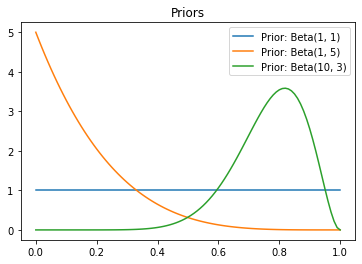

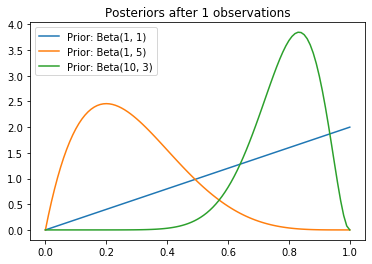

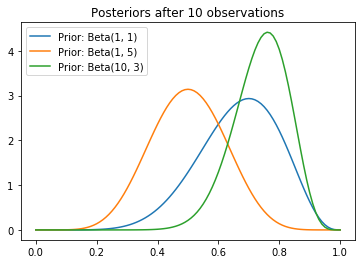

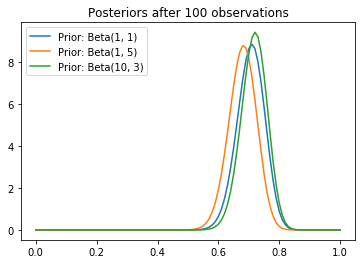

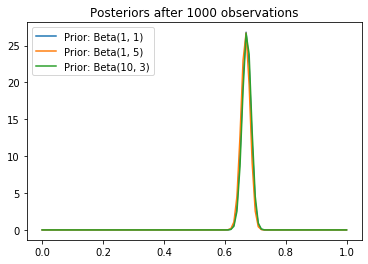

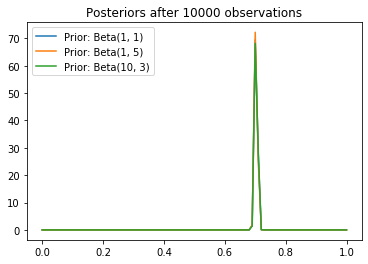

In [13]:
theta_true = 0.7
ns = [0, 1, 10, 100, 1000, 10000]

x = np.linspace(0, 1, 101)

# Priors
a_priors = [1, 1, 10]
b_priors = [1, 5, 3]

for n in ns:
    D = ''.join(random.choices(['b', 'w'], weights=[theta_true, 1-theta_true], k=n))
    n_w = len(re.findall('w', D))
    n_b = len(re.findall('b', D))
    for i in range(len(a_priors)):
        f = beta.pdf(x, a=a_priors[i] + n_b, b=b_priors[i] + n_w)
        plt.plot(x, f, label='Prior: Beta(%s, %s)' % (a_priors[i], b_priors[i]))
    if n > 0:
        plt.title('Posteriors after %s observations' % n)
    else:
        plt.title('Priors')
    plt.legend()
    plt.show()

## Predictive distribution

\begin{eqnarray*}
  P(b\mid D, \alpha, \beta) & = & \int_{0}^{1} P(b\mid \theta, D, \alpha, \beta) P(\theta\mid D, \alpha, \beta)\mathrm{d} \theta\\
  & = & \int_{0}^{1} P(b\mid \theta) P(\theta\mid D, \alpha, \beta)\mathrm{d} \theta\\
  & = & \int_{0}^{1} \theta P(\theta\mid D, \alpha, \beta)\mathrm{d} \theta\\
  & = & E_P (\theta)\\
  & = & \frac{\alpha + N_b}{\alpha + N_b + \beta + N_w}.
 \end{eqnarray*} 
- Sounds rational.
- Notice how the hyperparameters $\alpha$ and $\beta$ act like extra counts (pseudocounts).$$$$
- Predictive probabilities change less radically when $\alpha + \beta$ is large
- Interpretation: before formulation the prior, one has experience of previous observations - thus with $\alpha + \beta$ one can indicate confidence measured in observations
- Called "equivalent sample size"

In [14]:
pred = a_posterior/(a_posterior + b_posterior)
print('Prediction: probability of observing a black ball = %s' % pred)

Prediction: probability of observing a black ball = 0.6818181818181818


As evidence accumulates, our beliefs converge

## Summarising posterior

In [15]:
def posteriorSummaries(a_prior, b_prior, n_b, n_w):
    theta_map = (a_prior + n_b - 1)/(a_prior + b_prior + n_b + n_w - 2)
    theta_mean = (a_prior + n_b)/(a_prior + b_prior + n_b + n_w)
    theta_ml = n_b/(n_b + n_w)
    return theta_map, theta_mean, theta_ml

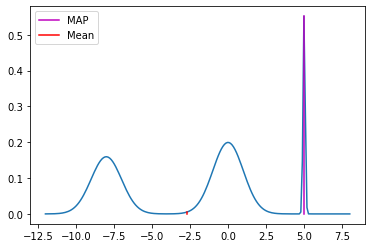

Mean: -2.7


In [16]:
def f(x):
    return pi1*dist1.pdf(x) + pi2*dist2.pdf(x) + pi3*dist3.pdf(x)

mu1 = 0
sigma1 = np.sqrt(1)
dist1 = norm(mu1, sigma1)

mu2 = 5
sigma2 = np.sqrt(0.005)
dist2 = norm(mu2, sigma2)

mu3 = -8
sigma3 = np.sqrt(1)
dist3 = norm(mu3, sigma3)

pi1 = 0.5
pi2 = 0.1
pi3 = 1 - pi1 - pi2

x = np.linspace(-12, 8, 200)
y = f(x)

plt.plot(x, y)

map_ind = np.argmax(y)
plt.plot([x[map_ind], x[map_ind]], [0, y[map_ind]], c='m', label='MAP')

m = pi1*mu1 + pi2*mu2 + pi3*mu3
plt.plot([m, m], [0, f(m)], c='r', label='Mean')
plt.legend()
plt.show()

print('Mean: %s' % m)

